# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

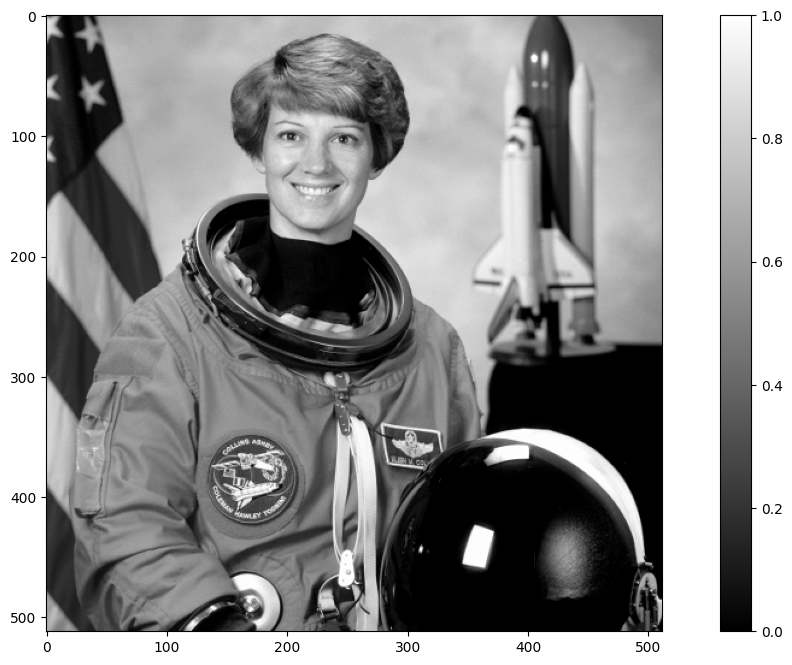

In [13]:
import numpy
import matplotlib.pyplot as plt
img = plt.imread('data/astronaut.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
plt.colorbar()

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [14]:


def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2

    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0

        if (p[0] >= n and p[0] < img_in.shape[0] - n and
            p[1] >= n and p[1] < img_in.shape[1] - n):

            for q in numpy.ndindex(size, size):
                neighborhood_sum += img_in[
                    p[0] + q[0] - n,
                    p[1] + q[1] - n
                ]

            neighborhood_mean = neighborhood_sum / (size * size)
            result[p[0], p[1]] = neighborhood_mean

    return result


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

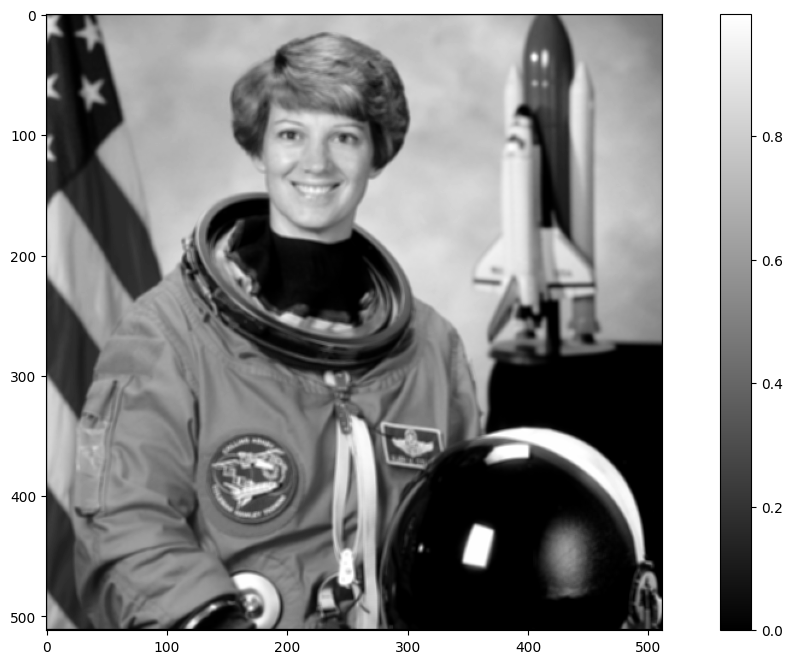

In [15]:

img_filter = meanfilter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_filter, 'gray')
plt.colorbar()


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

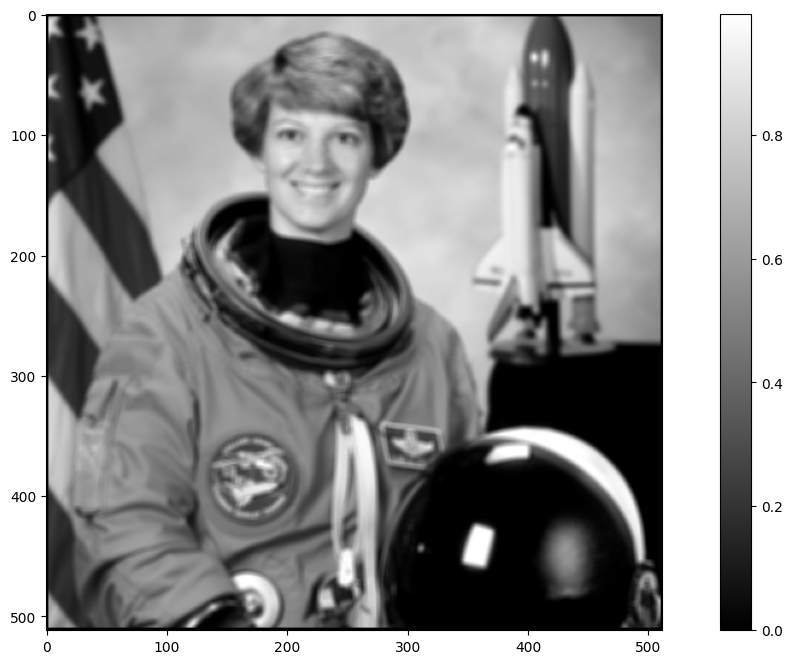

In [16]:

img_testfilter = plt.imread('data/astronaut_meanfilter5.png')
plt.figure(figsize=(15,8))
plt.imshow(img_testfilter, 'gray')
plt.colorbar()

img_filter5 = meanfilter(img, 5)

assert numpy.allclose(img_testfilter, img_filter5, atol=1/255)


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [31]:
import statistics
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2

    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0

        if (p[0] >= n and p[0] < img_in.shape[0] - n and
            p[1] >= n and p[1] < img_in.shape[1] - n):

            for q in numpy.ndindex(size, size):
                median_list = list()
                median_list.append(img_in[p[0] + q[0] - n,
                    p[1] + q[1] - n
                ])
            
                median_list.sort()
                length = len(median_list)
                i = length//2
                median = median_list[i]


            neighborhood_median = neighborhood_sum + median
            result[p[0], p[1]] = neighborhood_median

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

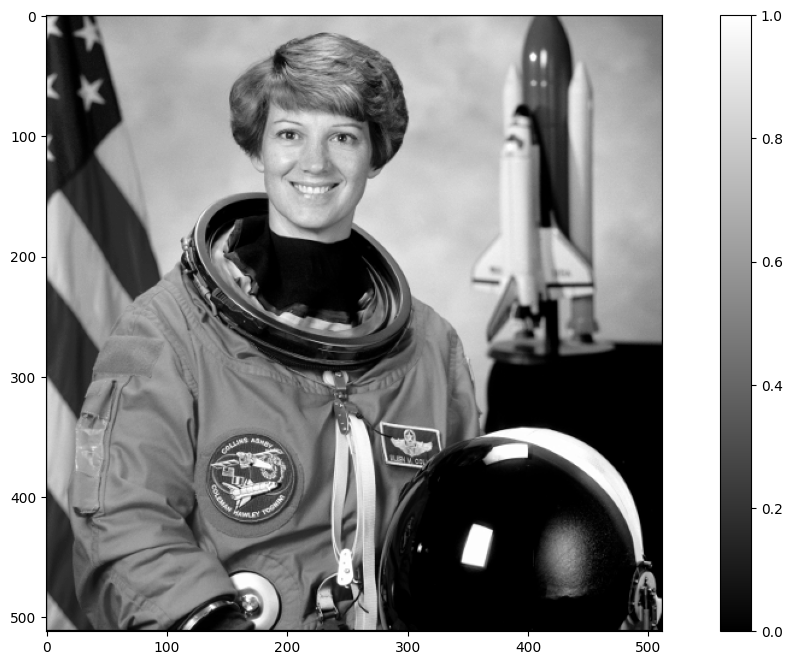

In [32]:
img_median = medianfilter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_median, 'gray')
plt.colorbar()

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

AssertionError: 

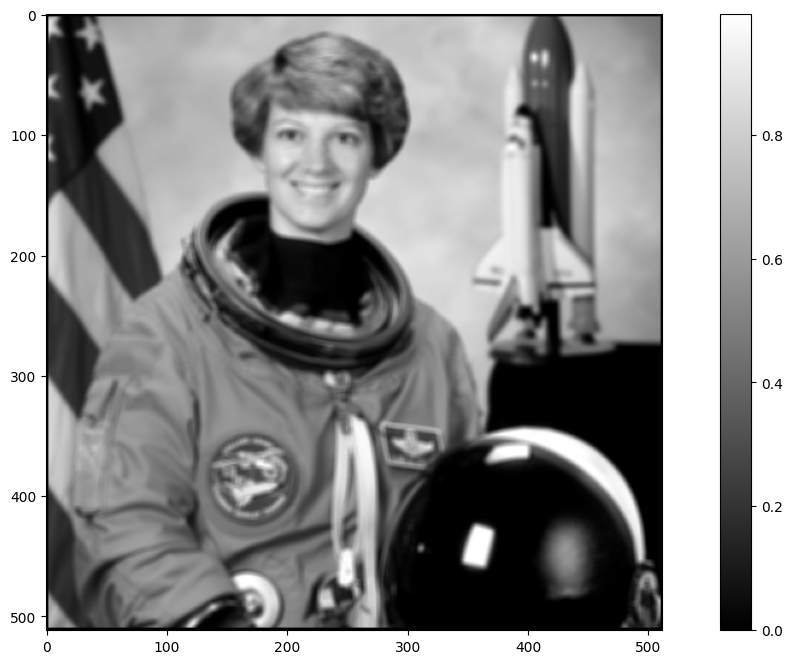

In [33]:
img_testmedian5 = plt.imread('data/astronaut_medianfilter5.png')
plt.figure(figsize=(15,8))
plt.imshow(img_testfilter, 'gray')
plt.colorbar()

img_median5 = medianfilter(img, 5)
assert numpy.allclose(img_testmedian5, img_median5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [24]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

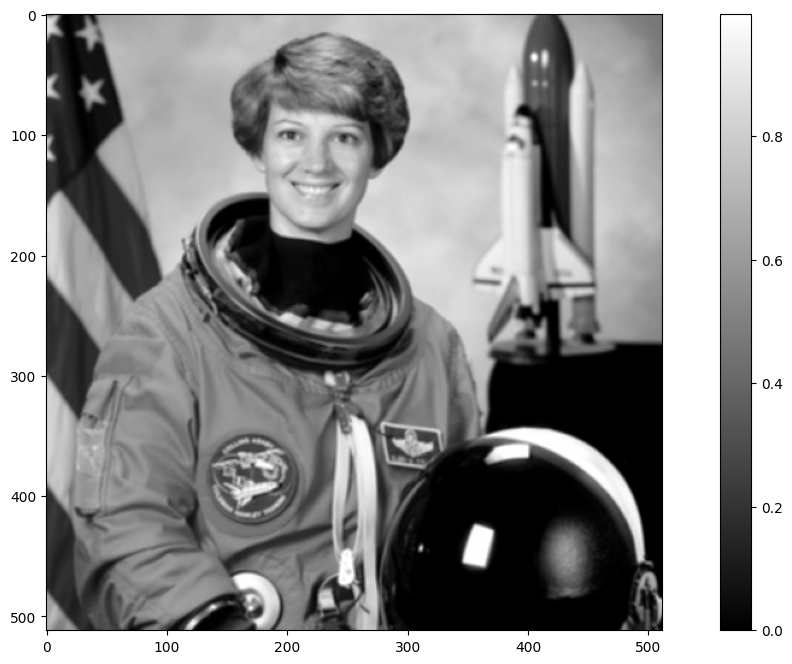

In [ ]:
img_smean = scipy.ndimage.uniform_filter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_smean, 'gray')
plt.colorbar()

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

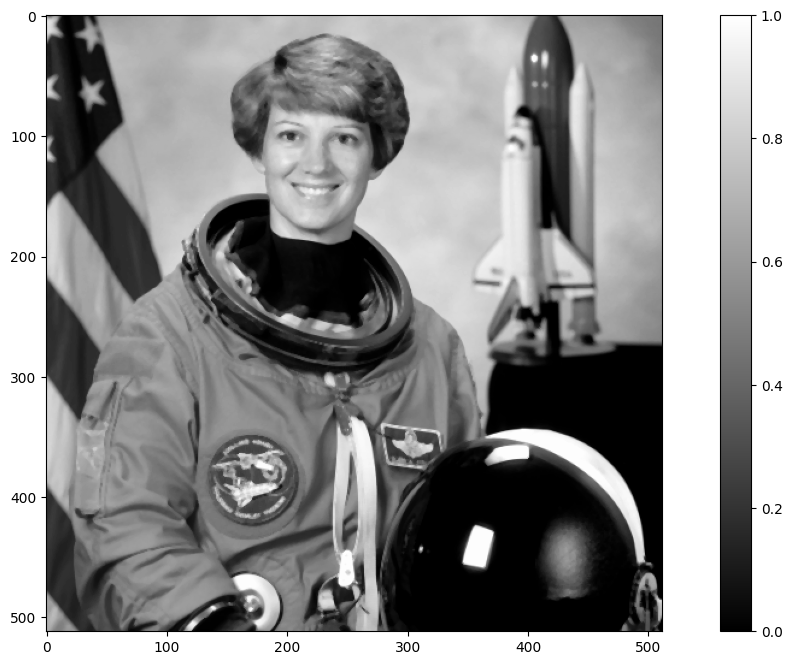

In [26]:
img_smedian = scipy.ndimage.median_filter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_smedian, 'gray')
plt.colorbar()

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

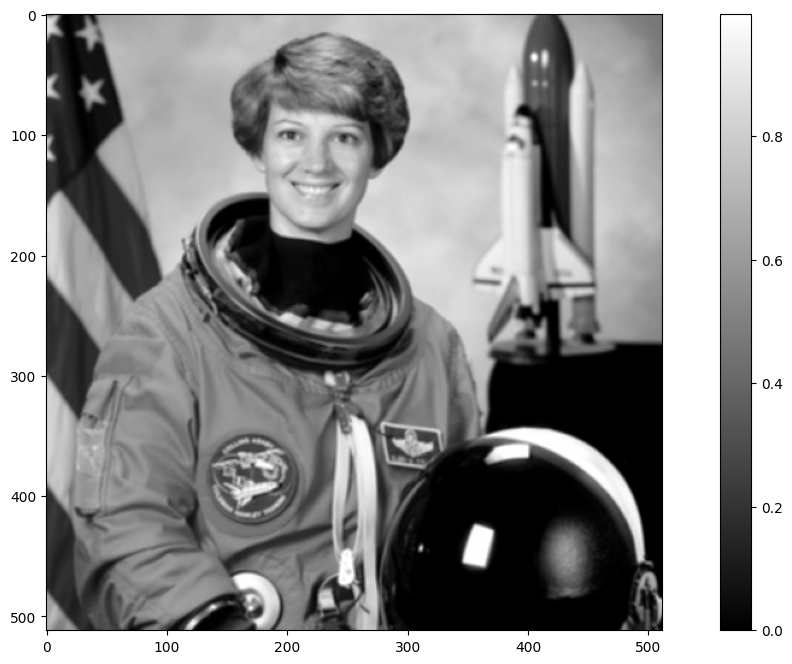

In [27]:
img_sgaus = scipy.ndimage.uniform_filter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_sgaus, 'gray')
plt.colorbar()

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [ ]:
assert numpy.allclose(img_median5, img_median5, atol=1/255)

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [18]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: